In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [135]:
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

In [218]:
titles = imdb_akas_df[imdb_akas_df['region'] == 'US'].drop_duplicates(subset=['title_id'])
add_ratings = titles.join(imdb_ratings_df.set_index('tconst'), on='title_id')
add_ratings = add_ratings[['title_id', 'title', 'attributes', 'averagerating', 'numvotes']]

In [219]:
directors = imdb_principals_df[imdb_principals_df['category'] == 'director']
add_director = titles_ratings.join(directors.set_index('tconst'), on='title_id')
add_dir_name = add_director.join(imdb_name_df.set_index('nconst'), on='nconst')
add_gross = add_dir_name.join(movie_gross_df.set_index('title'), on='title')

add_gross['foreign_gross'] = add_gross['foreign_gross'].str.replace(',', '').apply(lambda x: float(x))
add_gross['worldwide_gross'] = add_gross['domestic_gross'] + titl_rat_dirname_gross['foreign_gross']

In [221]:
dropped = add_gross.dropna(subset=['primary_name','worldwide_gross'])

director_df = dropped.groupby('primary_name').mean()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
director_df = director_df[['averagerating', 'worldwide_gross']]

In [222]:
top20_directors = director_df.sort_values(by='worldwide_gross', ascending=False )[:20]
top20_dir_by_rating = top20_directors.sort_values(by='averagerating')

In [233]:
names = top20_dir_by_rating.index
ratings = top20_dir_by_rating.averagerating.values.round(2)
names_with_rating = [x+': '+str(y) for x,y in zip(names, ratings)]
gross = [round(x,2) for x in top20_dir_by_rating.worldwide_gross]

In [249]:
top_rated = top_20_dir_by_rating[-10:].averagerating.index
top_grossed = top_20_dir.worldwide_gross[:10].index
top_directors = top_rated.intersection(top_grossed)

In [246]:
corr = round(top20_directors.corr().iloc[0][1], 2)
print(f'Correlation between average worldwide gross and average rating for the top 20 directors is: {corr}')

Correlation between average worldwide gross and average rating for the top 20 directors is: 0.07


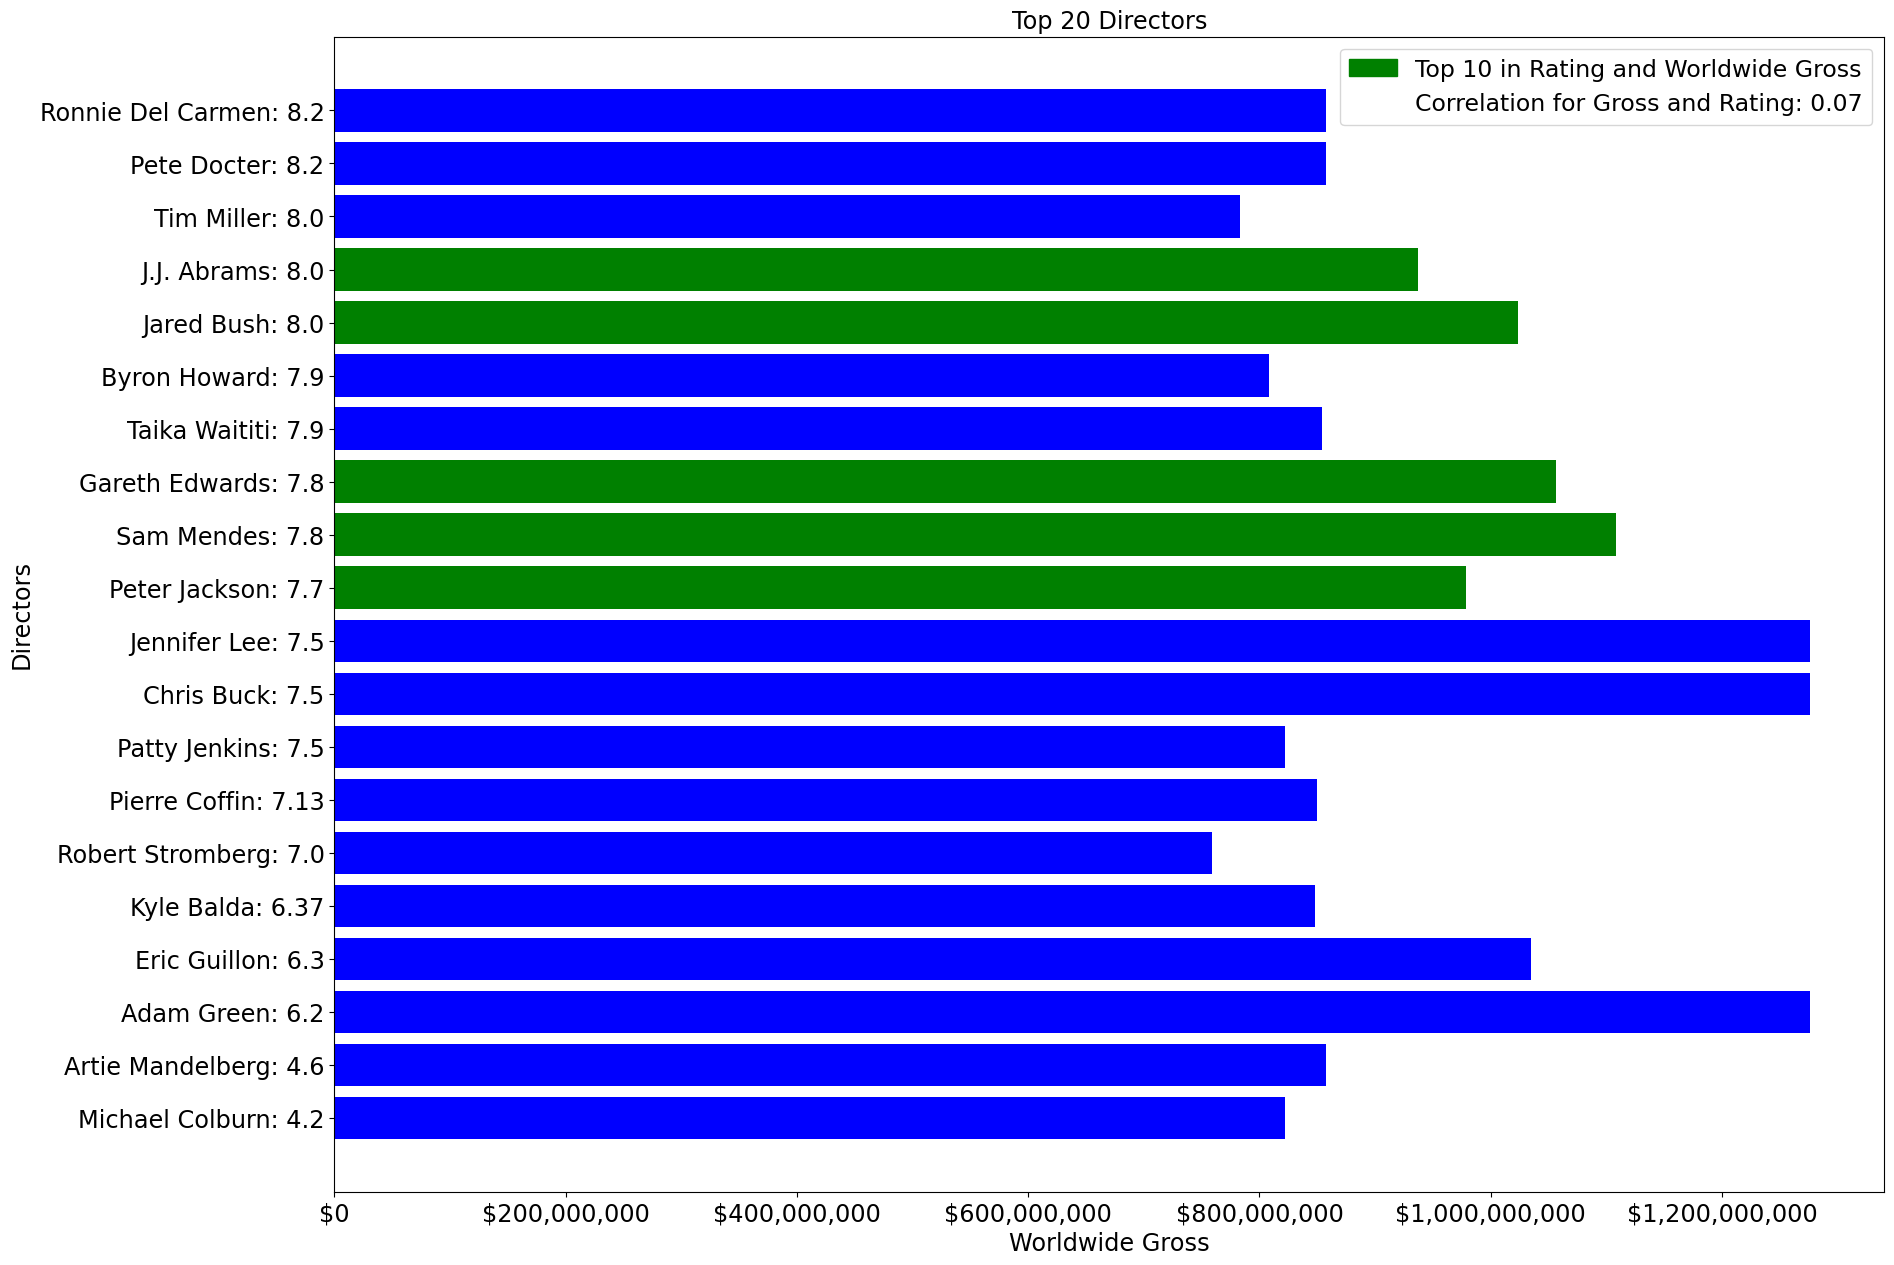

In [248]:
fig, ax = plt.subplots(figsize=(20,15))

bin_colors = ['b' if x not in top_directors else 'g' for x in top20_dir_by_rating.index]

ax.barh(names_with_rating, gross, color=bin_colors)
ax.set_title('Top 20 Directors', size='xx-large')

ax.set_ylabel('Directors', size='xx-large')
ax.set_yticks(list(range(0,20)))
ax.set_yticklabels(names_with_rat, size='xx-large')

ax.set_xlabel('Worldwide Gross', size='xx-large')
x_ticks = [0,200000000, 400000000, 600000000, 800000000, 1000000000, 1200000000]
x_lables = ['$0', '$200,000,000', '$400,000,000', '$600,000,000', \
            '$800,000,000', '$1,000,000,000', '$1,200,000,000']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_lables, size='xx-large')

green_patch = mpatches.Patch(color='green', label='Top 10 in Rating and Worldwide Gross')
corr_patch = mpatches.Patch(color='None',label=f'Correlation for Gross and Rating: {corr}')
plt.legend(handles=[green_patch, corr_patch], prop={'size': 17}, loc='upper right');